# Example workflow calculation. Data reprocessing CPU

In this example we show the calculation to estimate the CPU needed to process data on the Grid at Tier-1s and Tier-2s. 

In this configuration, we process the data collected each year twice, and the data from the previous years in the same Run once. 

For instance:
* in 2016: we run 2016 data twice; 
* in 2017: 2017 twice, 2016 once;
* in 2018: 2018 twice, 2017 and 2016 once.

## Input parameters
CPU is measured in seconds/event in a CPU core  
Sizes (for Disk and Tape) in kBytes/event 
Atomic unit is the event. 

For each year (between 2015 and 2029) the computing model parameters can vary. Computing model parameters are stored in the *inP* dictionary:
   - RealRecoCPU is the # of seconds of CPU to run reconstruction for one event
   - CPUEffReco is the CPU efficiency achieved (the CPU does not always work 100% of its capabilities)
   - SameYrReprData is how many times data from the current year is processed
   - PrevYrReprData is how many times data from previous years is processed
   - ReprYrs is a list of years for which data is reprocessed in the current year (eg in 2018 we may wish to process 2015, 2016, 2017)

The operation parameters from the LHC and the ATLAS trigger are stored in the *LhcP* dictionary:
   - Rate is the averge rate of output from the High Level Trigger (HLT) (number of events per second)
   - RunTime is how many seconds we expect the LHC to operate in a given year
   
Parameters are realistic, but somewhat invented. They reflect the growth in CPU/event needed to process events at higher lumi and higher <mu>

In [0]:
#
# inP is the global variable to store all the performance parameters.
# LhcP is the global variable to store the LHC running parameters
#
inP={}
LhcP={}

years=range(2015,2029)
# Constants
Seconds_in_year=365*86400



In [0]:
#
# Parameters to be used for this examples. 
#

def costModelPars():
    #
    # LHC operating parameters
    # Rate in Hz and RunTime in sec
    #
    LhcP[2015]={'Rate':1000, 'RunTime':3.0E06} # Run 2
    LhcP[2016]={'Rate':1000, 'RunTime':7.3E06} # Run 2
    LhcP[2017]={'Rate':1000, 'RunTime':7.3E06} # Run 2
    LhcP[2018]={'Rate':1000, 'RunTime':7.3E06} # Run 2
    LhcP[2019]={'Rate':0, 'RunTime':0.0} # LS2; shutdown
    LhcP[2020]={'Rate':0, 'RunTime':0.0} # LS2; shutdown
    LhcP[2021]={'Rate':1000, 'RunTime':7.3E06} # Run 3
    LhcP[2022]={'Rate':1000, 'RunTime':7.3E06} # Run 3
    LhcP[2023]={'Rate':1000, 'RunTime':7.3E06} # Run 3
    LhcP[2024]={'Rate':0, 'RunTime':0.0} # LS3; shutdown
    LhcP[2025]={'Rate':0, 'RunTime':0.0} # LS3; shutdown
    LhcP[2026]={'Rate':10000, 'RunTime':7.3E06} # Run 4: big upgrade, as the rate was increased tenfold!
    LhcP[2027]={'Rate':10000, 'RunTime':7.3E06} # Run 4
    LhcP[2028]={'Rate':10000, 'RunTime':7.3E06} # Run 4
    
    #
    # CPU parameters
    #
    # seconds of CPU to reconstruct data, size of the produced file
    inP[2015]={'RealRecoCPU':20, 'AODSize': 250, 'RAWSize': 1000} 
    inP[2016]={'RealRecoCPU':20, 'AODSize': 250, 'RAWSize': 1000}
    inP[2017]={'RealRecoCPU':25, 'AODSize': 250, 'RAWSize': 1000}
    inP[2018]={'RealRecoCPU':25, 'AODSize': 250, 'RAWSize': 1000}
    inP[2019]={'RealRecoCPU':25, 'AODSize': 250, 'RAWSize': 1000}
    inP[2020]={'RealRecoCPU':25, 'AODSize': 250, 'RAWSize': 1000}
    inP[2021]={'RealRecoCPU':50, 'AODSize': 350, 'RAWSize': 1000}
    inP[2022]={'RealRecoCPU':50, 'AODSize': 350, 'RAWSize': 1000}
    inP[2023]={'RealRecoCPU':50, 'AODSize': 350, 'RAWSize': 1000}
    inP[2024]={'RealRecoCPU':50, 'AODSize': 350, 'RAWSize': 1000}
    inP[2025]={'RealRecoCPU':130, 'AODSize': 1000, 'RAWSize': 5000}
    inP[2026]={'RealRecoCPU':130, 'AODSize': 1000, 'RAWSize': 5000}
    inP[2027]={'RealRecoCPU':130, 'AODSize': 1000, 'RAWSize': 5000}
    inP[2028]={'RealRecoCPU':130, 'AODSize': 1000, 'RAWSize': 5000}
    
    # Assume CPU efficiency is at 75% 
    for year in years:
        inP[year].update({'CPUEffReco':0.75})
        
    #
    # Reprocessing parameters
    #
    for year in years:
        inP[year].update({'SameYrReprData':2})
        inP[year].update({'PrevYrReprData':1})

    inP[2015].update({'ReprYrs':[]})
    inP[2016].update({'ReprYrs':[2015]})
    inP[2017].update({'ReprYrs':[2015,2016]})
    inP[2018].update({'ReprYrs':[2015, 2016, 2017]})
    inP[2019].update({'ReprYrs':[2015, 2016, 2017, 2018]})
    inP[2020].update({'ReprYrs':[]}) # all previous data from previous years with the given tech
    inP[2021].update({'ReprYrs':[]})
    inP[2022].update({'ReprYrs':[2021]})
    inP[2023].update({'ReprYrs':[2021,2022]})
    inP[2024].update({'ReprYrs':[2021,2022,2023]})
    inP[2025].update({'ReprYrs':[]})
    inP[2026].update({'ReprYrs':[]})
    inP[2027].update({'ReprYrs':[2026]})
    inP[2028].update({'ReprYrs':[2026,2027]})  
    

    

## Calculations for data reprocessing
For each year we calculate the CPU needed to reprocess data. This is the sum of the CPU needed to reprocess the current year data (twice) and the CPU needed to reprocess some of the previous years data. 

The assumption for the reprocessing parameters are in the inP dictionary. The LHC parameters are used to calculate the number of events that are collected each year. (So this will be zero during long shutdown years)

In [0]:
# Output quantities
NDataEvts={}
CPUOneRound={}
CPURepr={}

# Use default values for parameters
costModelPars()

for year in years:
    print (year, inP[year])
    print()

2015 {'RealRecoCPU': 20, 'AODSize': 250, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': []}

2016 {'RealRecoCPU': 20, 'AODSize': 250, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': [2015]}

2017 {'RealRecoCPU': 25, 'AODSize': 250, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': [2015, 2016]}

2018 {'RealRecoCPU': 25, 'AODSize': 250, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': [2015, 2016, 2017]}

2019 {'RealRecoCPU': 25, 'AODSize': 250, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': [2015, 2016, 2017, 2018]}

2020 {'RealRecoCPU': 25, 'AODSize': 250, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': []}

2021 {'RealRecoCPU': 50, 'AODSize': 350, 'RAWSize': 1000, 'CPUEffReco': 0.75, 'SameYrReprData': 2, 'PrevYrReprData': 1, 'ReprYrs': [

In [0]:

print ("year \t NEvnt \t CPU1 \t CPU2 \t CPUprv \t CPUall \n")
print ("\t *10^9 \t kcores kcores \t kcores \t kcores \n")

for year in years:
# Total number of data events
    NDataEvts[year]=LhcP[year]['Rate']*LhcP[year]['RunTime'] # Number of data events recorded

# Number of CPU cores needed to process all the data of a given year once
    CPUOneRound[year]=NDataEvts[year]*inP[year]['RealRecoCPU']/inP[year]['CPUEffReco']/Seconds_in_year  

# Number of CPU cores needed to process all the data of a given year 
    CPUCurrYr=CPUOneRound[year]*inP[year]['SameYrReprData']

# Calculate the number of CPU cores needed to reprocess previous years (this is more complex)
    CPUPrevYr=0.
    for yr in inP[year]['ReprYrs']:
        CPUPrevYr += CPUOneRound[yr]*inP[year]['PrevYrReprData']

# Total CPU needed for reprocessing
    CPURepr[year]=CPUCurrYr+CPUPrevYr

    print (year, '\t',
    "%5.1f"%(NDataEvts[year]/1E9),
    ('\t'),
    "%5.0f"%(CPUOneRound[year]/1000.), # Divide by 1000. to get kCores
    ('\t'),
    "%5.0f"%(CPUCurrYr/1000.),
    ('\t'),
    "%5.0f"%(CPUPrevYr/1000.),
    ('\t \t'),
    "%5.0f"%(CPURepr[year]/1000.))  


year 	 NEvnt 	 CPU1 	 CPU2 	 CPUprv 	 CPUall 

	 *10^9 	 kcores kcores 	 kcores 	 kcores 

2015 	   3.0 	     3 	     5 	     0 	 	     5
2016 	   7.3 	     6 	    12 	     3 	 	    15
2017 	   7.3 	     8 	    15 	     9 	 	    24
2018 	   7.3 	     8 	    15 	    16 	 	    32
2019 	   0.0 	     0 	     0 	    24 	 	    24
2020 	   0.0 	     0 	     0 	     0 	 	     0
2021 	   7.3 	    15 	    31 	     0 	 	    31
2022 	   7.3 	    15 	    31 	    15 	 	    46
2023 	   7.3 	    15 	    31 	    31 	 	    62
2024 	   0.0 	     0 	     0 	    46 	 	    46
2025 	   0.0 	     0 	     0 	     0 	 	     0
2026 	  73.0 	   401 	   802 	     0 	 	   802
2027 	  73.0 	   401 	   802 	   401 	 	  1204
2028 	  73.0 	   401 	   802 	   802 	 	  1605


In [0]:
import plotly 
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

#print [CPURepr[x] for x in years] 

data1 = go.Scatter(x=years, y=[CPURepr[x] for x in years], mode='lines+markers', name='CPU')
layout = go.Layout(title="CPU needs (#cores) per year")
data = [data1,]
plotly.offline.iplot({"data": data, "layout": layout})

ModuleNotFoundError: No module named 'plotly'

# Exercise 1

Try now to calculate how much CPU is needed for producing simulated data (Monte Carlo). 
Monte Carlo production happens in 3 steps: 

1) Event Generation: from a random seed one produces a "perfect event" (no interaction with the detector). This requires in average 10 seconds of CPU per event. 

2) Detector Simulation: you simulate the interactions of the particles with the instrument (the detector). This might be very time consuming. Consider 350 seconds of CPU/event 

3) Event Reconstruction: similar to reconstruction for real data, use the same number of seconds/event 

Every year you need to simulate the same # of events as the real data you collect. However, you need to reconstruct them twice every year, to adjust for the correct data taking conditions

In the years when you have no data taking, you still need to produce Monte Carlo samples. You need to double up the event statistic you produced in the previous years of Run. For example if during LHC Run-2 (2015, 2016, 2017) you produced N events, in the 2019,2020 shutdown you need to produce other N.  

Do you need more CPUs for data or Monte Carlo? 


In [0]:
# Seconds needed in order to produce a perfect event
EvtGen = 10 

# Seconds needed in order to simulate interactions with the detector
DetSim = 350

# Seconds needed in order to reconstruct a single event; possible choices: [20, 25, 50, 130]
EvtReco = []
for year in years:
    EvtReco.append(inP[year]['RealRecoCPU'])

# Number of reconstructions per year
NumReco = 2

# Number of simulated events per year
NumSim = []
add = 0
num_shut = 2 #number opf years of shutdown
frac = 0.5 # fraction of data simulated in the first year of the shutdown (assuming two year shutdowns!)

for year in years:
    if NDataEvts[year] != 0:
        add += NDataEvts[year]
        NumSim.append(NDataEvts[year])
    else:
        for i in range(num_shut):
            NumSim.append(int(add*frac))
        add = 0    
        
NumSim = list(filter(lambda a: a != 0, NumSim)) # removing occurrences of zeros...


# Output quantities
GenCPU = []
SimCPU = []
RecoCPU = []
CPUTOT = {}

print ("year \t NSIMEvnt GenCPU SimCPU RecoCPU \t CPUTOT \n")
print ("\t *10^9 \t kcores kcores \t kcores \t kcores \n")
for year in years:
    
# Number of CPU cores needed to generate all events in a year
    GenCPU.append(NumSim[year-years[0]]*EvtGen/inP[year]['CPUEffReco']/Seconds_in_year)

# Number of CPU cores needed to simulate the interactions of a given year 
    SimCPU.append(NumSim[year-years[0]]*DetSim/inP[year]['CPUEffReco']/Seconds_in_year)

# Number of CPU cores needed to reconstruct all simulations
    RecoCPU.append(NumSim[year-years[0]]*EvtReco[year-years[0]]*NumReco/inP[year]['CPUEffReco']/Seconds_in_year)
    
# Total CPU needed for reprocessing
    CPUTOT[year] = (GenCPU[year-years[0]]+SimCPU[year-years[0]]+RecoCPU[year-years[0]])

    print (year, '\t',
    "%5.1f"%(NumSim[year-years[0]]/1E9),
    ('\t'),
    "%5.0f"%(GenCPU[year-years[0]]/1000.), # Divide by 1000. to get kCores
    ('\t'),
    "%5.0f"%(SimCPU[year-years[0]]/1000.),
    ('\t'),
    "%5.0f"%(RecoCPU[year-years[0]]/1000.),
    ('\t \t'),
    "%5.0f"%(CPUTOT[year]/1000.))  

    
    
import numpy as np
import pandas as pd


CPUMC = np.array(pd.DataFrame(CPUTOT, index=[1])).T
CPURAW = pd.DataFrame(CPURepr, index=[1])
CPURAW = np.array(CPURAW).T

year 	 NSIMEvnt GenCPU SimCPU RecoCPU 	 CPUTOT 

	 *10^9 	 kcores kcores 	 kcores 	 kcores 

2015 	   3.0 	     1 	    44 	     5 	 	    51
2016 	   7.3 	     3 	   108 	    12 	 	   123
2017 	   7.3 	     3 	   108 	    15 	 	   127
2018 	   7.3 	     3 	   108 	    15 	 	   127
2019 	  12.4 	     5 	   184 	    26 	 	   216
2020 	  12.4 	     5 	   184 	    26 	 	   216
2021 	   7.3 	     3 	   108 	    31 	 	   142
2022 	   7.3 	     3 	   108 	    31 	 	   142
2023 	   7.3 	     3 	   108 	    31 	 	   142
2024 	  10.9 	     5 	   162 	    46 	 	   213
2025 	  10.9 	     5 	   162 	   120 	 	   287
2026 	  73.0 	    31 	  1080 	   802 	 	  1914
2027 	  73.0 	    31 	  1080 	   802 	 	  1914
2028 	  73.0 	    31 	  1080 	   802 	 	  1914


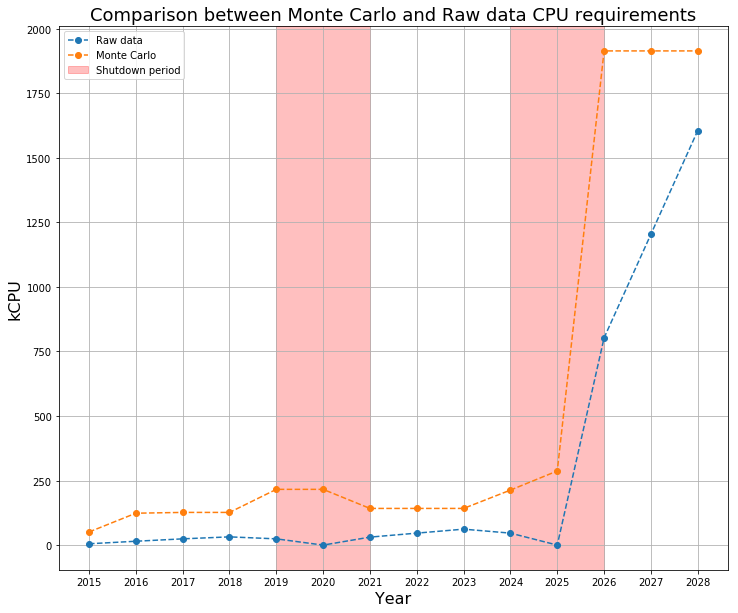

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title("Comparison between Monte Carlo and Raw data CPU requirements", fontsize = 18)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("kCPU", fontsize = 16)
plt.xticks(np.arange(years[-1]-years[0]+1), years)
plt.grid()
plt.plot(CPURAW/1000., label="Raw data", linestyle='--', marker='o')
plt.plot(CPUMC/1000., label="Monte Carlo", linestyle='--', marker='o')
#denoting shutdown years
plt.axvspan(4,6, alpha=0.25, color='red', label='Shutdown period')
plt.axvspan(9,11, alpha=0.25, color='red')
plt.legend()
plt.show()

## Exercise 2

Try now to calculate how much disk and tape space you need in order to store the data. 

1) You need to store 2 copies of the RAW data on tape. You need to store 10% of the RAW data of the current year on disk 

2) For DATA, you need to store one copy of the AODs on tape. You need to store 2 copies of the AODs on disk for the AODs of the current year. You need to store one copy of the AODs of the previous years on disk. 

3) For Monte Carlo, you need to store the ouput of Detector Simulation (HITS) on tape and keep 10% of it on disk. One event of HITS is approximately 1MB. You also need to keep 1 copy of the AODs on disk. One simulated AOD is 30% larger in size than a data AOD.  

4) In order to facilitate analysis, you need to consider 30% additional space for AODs to be available in the form of a cache, to facilitate data access

5) You can never fill up disk at 100%. Leave a 10% safety margin. 





In [0]:
import numpy as np


TapeRaw = 2 #num copies of RAW data on tape
RawFracCurrYr = 0.1 #fraction of current year raw data saved on disk

TapeAOD = 1 #num copies of AOD
AODDiskCurrYr = 2 #num copies AOD on disk for current year
AODDiskPrevYr = 1 #num copies AOD on disk prev year

TapeHITS = 1 #num of copies of HITS to be saved on tape
HITSFracDisk = 0.1 #fraction of HITS to be kept on disk

HITSSize = 1e3 #MB
DiskSimAOD = 1 #number of simulated AOD
SimAODSize = {}

AODCache = 0.3 #additional cache memory
Safety_margin = 0.1 #memory on disk to be kept empty (safety measure)


Tape = {}
Disk = {}
TotMem = {}
    
print ("year \t Tape (1e9 bytes) \t Disk (1e9 bytes) \t Total memory (1e9 bytes) \n")
for year in years:
    #
    # TAPE
    #
    RAWTape = TapeRaw*inP[year]['RAWSize']*NDataEvts[year]
    AODTape = TapeAOD*inP[year]['AODSize']*NDataEvts[year]#*(1+AODCache)
    HITSTape = TapeHITS*HITSSize*NumSim[year-years[0]]
    
    Tape[year] = RAWTape + AODTape + HITSTape
    
    #
    # DISK
    #
    RAWDisk = RawFracCurrYr*inP[year]['RAWSize']*NDataEvts[year]
    #
    #summing up disk to current year; for each year, number of observed data*size at that year
    #Use the first version if you want to include Monte Carlo simulations in the data to be saved on disk in the
    #following years
    #Use the second if only "real" data
    
    #prev_yrs_disk = np.sum(np.array([(NDataEvts[y]+NumSim[year-years[0]])*inP[y]['AODSize'] for y in range(years[0],year)]))
    prev_yrs_disk = np.sum(np.array([NDataEvts[y]*inP[y]['AODSize'] for y in range(years[0],year)]))
    
    
    AODDisk = (AODDiskCurrYr*inP[year]['AODSize']*NDataEvts[year] + AODDiskPrevYr * prev_yrs_disk)*(1+AODCache)
    HITSDisk = HITSFracDisk*HITSSize*NumSim[year-years[0]]
    SimAODDisk = (DiskSimAOD*1.3*inP[year]['AODSize']*NumSim[year-years[0]])*(1+AODCache)
    
    Disk[year] = (RAWDisk + AODDisk + HITSDisk + SimAODDisk)*(1+Safety_margin)
    
    #
    # Total memory
    #
    TotMem[year] = Tape[year] + Disk[year]
    
    print (year, '\t',
    "%5.0f"%(Tape[year]/1e6),
    ('\t\t'),
    "%5.0f"%(Disk[year]/1e6),
    ('\t\t'),
    "%5.0f"%(TotMem[year]/1e6),
    ('\t\t'))
    

year 	 Tape (1e9 bytes) 	 Disk (1e9 bytes) 	 Total memory (1e9 bytes) 

2015 	 9750000 		 4199250 		 13949250 		
2016 	 23725000 		 11290675 		 35015675 		
2017 	 23725000 		 13900425 		 37625425 		
2018 	 23725000 		 16510175 		 40235175 		
2019 	 12450000 		 16057388 		 28507388 		
2020 	 12450000 		 16057388 		 28507388 		
2021 	 24455000 		 22564795 		 47019795 		
2022 	 24455000 		 26218445 		 50673445 		
2023 	 24455000 		 29872095 		 54327095 		
2024 	 10950000 		 28191818 		 39141818 		
2025 	 10950000 		 41423250 		 52373250 		
2026 	 876000000 		 412529700 		 1288529700 		
2027 	 876000000 		 516919700 		 1392919700 		
2028 	 876000000 		 621309700 		 1497309700 		


# Exercise 3

One CPU core costs 100 Euros. One TB of disk costs 40 Euros. One TB of tape costs 10 Euros
What is the largest cost according to this simplified Computing Model 

In [0]:
Cost_per_CPU = 100
Cost_per_TB_Disk = 40
Cost_per_TB_Tape = 10

CPUCost = {}
DiskCost = {}
TapeCost = {}

TotCost = {}

print ("year \t CPU Cost (mln) Disk Cost (mln) Tape Cost (mln) Total Cost (mln)\n")

for year in years:
    
    CPUCost[year] = Cost_per_CPU * (CPUTOT[year] + CPUOneRound[year] + CPURepr[year])
    
    DiskCost[year] = Cost_per_TB_Disk * Disk[year] / 1e6
    
    TapeCost[year] = Cost_per_TB_Tape * Tape[year] / 1e6

    TotCost[year] = CPUCost[year] + DiskCost[year] + TapeCost[year]
    
    print (year, '\t',
    "%5.0f"%(CPUCost[year]/1e6),
    ('\t\t'),
    "%5.0f"%(DiskCost[year]/1e6),
    ('\t\t'),
    "%5.0f"%(TapeCost[year]/1e6),
    ('\t\t'),
    "%5.0f"%(TotCost[year]/1e6),
    ('\t\t'))

year 	 CPU Cost (mln) Disk Cost (mln) Tape Cost (mln) Total Cost (mln)

2015 	     6 		   168 		    98 		   271 		
2016 	    14 		   452 		   237 		   703 		
2017 	    16 		   556 		   237 		   809 		
2018 	    17 		   660 		   237 		   914 		
2019 	    24 		   642 		   124 		   791 		
2020 	    22 		   642 		   124 		   788 		
2021 	    19 		   903 		   245 		  1166 		
2022 	    20 		  1049 		   245 		  1314 		
2023 	    22 		  1195 		   245 		  1461 		
2024 	    26 		  1128 		   110 		  1263 		
2025 	    29 		  1657 		   110 		  1795 		
2026 	   312 		 16501 		  8760 		 25573 		
2027 	   352 		 20677 		  8760 		 29789 		
2028 	   392 		 24852 		  8760 		 34004 		


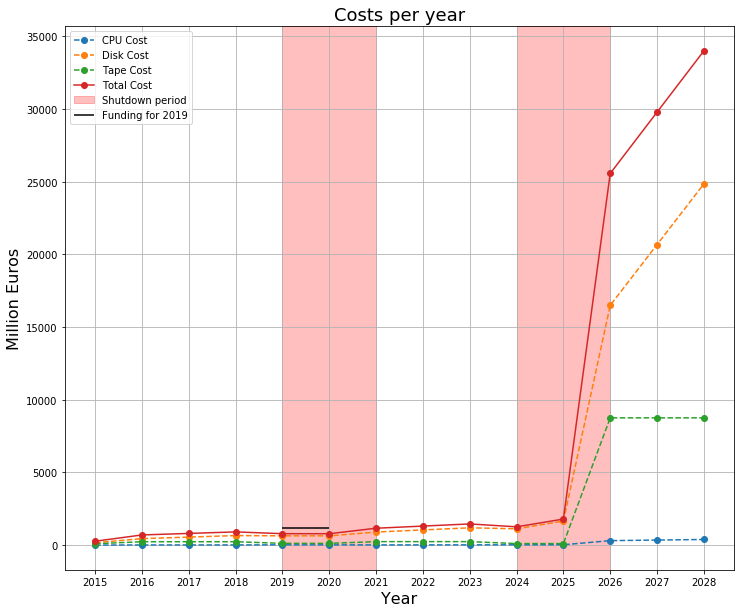

In order to create such a computing model, in 2019, 68 % of the total budget would have to be spent on computation alone.


In [0]:
pltcpu = np.array(pd.DataFrame(CPUCost, index=[1])).T
pltdisk = np.array(pd.DataFrame(DiskCost, index=[1])).T
plttape = np.array(pd.DataFrame(TapeCost, index=[1])).T
plttot = np.array(pd.DataFrame(TotCost, index=[1])).T



ax = plt.figure(figsize=(12,10))
plt.title("Costs per year", fontsize = 18)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Million Euros", fontsize = 16)
plt.xticks(np.arange(years[-1]-years[0]+1), years)
plt.grid()
plt.plot(pltcpu/1e6, label="CPU Cost", linestyle='--', marker='o')
plt.plot(pltdisk/1e6, label="Disk Cost", linestyle='--', marker='o')
plt.plot(plttape/1e6, label="Tape Cost", linestyle='--', marker='o')
plt.plot(plttot/1e6, label="Total Cost", marker='o')
#denoting shutdown years
plt.axvspan(4,6, alpha=0.25, color='r', label='Shutdown period')
plt.axvspan(9,11, alpha=0.25, color='r')
plt.hlines((1143473250+4529000+23167850)/1e6, 4,5, label="Funding for 2019")
plt.legend()
plt.show()

print("In order to create such a computing model, in 2019,", "{0:.0f}".format(TotCost[2019]/(1143473250+4529000+23167850)*100), 
     "% of the total budget would have to be spent on computation alone.")